# Palmer Penguins

***
This notebook contains my analyis of the famous palmer penguins dataset.

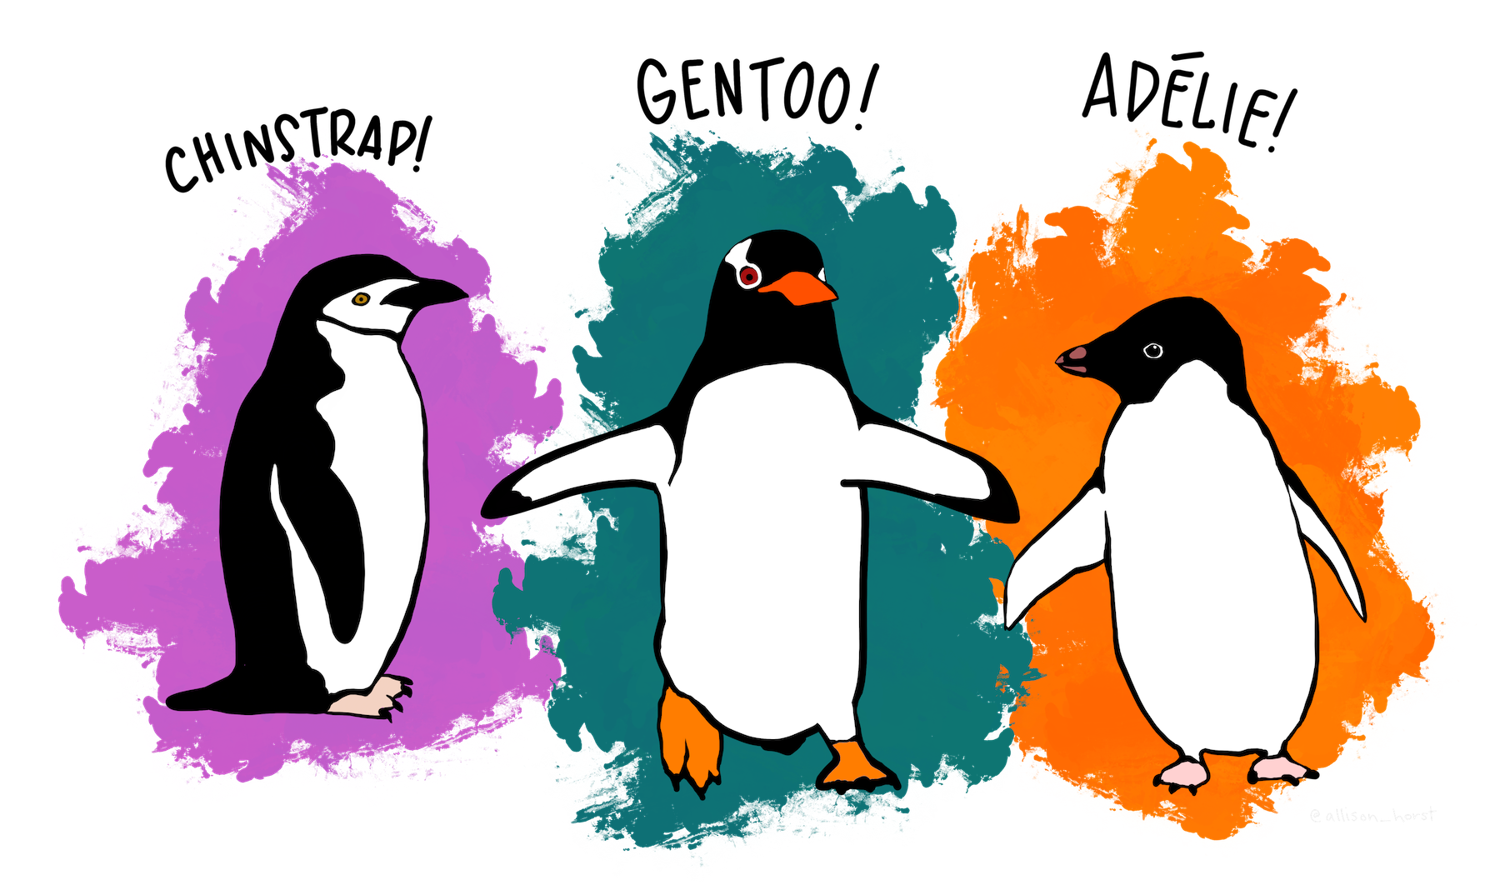

“Artwork by @allison_horst”

## Dataset Overview

The Palmer Penguins dataset is a dataset that is commonly used as an introduction to the field of data analytics. It contains data on penguins collected from three Antarctic islands: Dream, Torgersen, and Biscoe located in the Palmer Archipelago near Palmer Station. The dataset was created by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER. This dataset shares similarities with the famous Iris dataset, both datasets are of manageable size for beginner data analalysts and provide a good starting point to explore data analytical concepts and relationships. https://journal.r-project.org/articles/RJ-2022-020/


In [37]:
# Load the penguins data set.
import pandas as pd

url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv" # Location of data set used in this project
df = pd.read_csv(url)

# Let's have a look at the data
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Variables

The following list of variables are recorded in the dataset.

1. **species**:
    
    The species of penguins. This is a categorical variable with three levels: Adelie, Chinstrap, and Gentoo.

2. **island**:

    The island where the penguins were observed. This is also a categorical variable with three levels: Dream, Torgersen, and Biscoe.

3. **bill_length_mm**:

    The length of the penguin's bill in millimetres. This is a numerical variable representing a physical characteristic of the penguins.

4. **bill_depth_mm**:

    The depth of the penguin's bill in millimetres. Like bill_length_mm, this is also a numerical variable representing a physical characteristic.

5. **flipper_length_mm**:

    The length of the penguin's flipper in millimetres. Again, this is a numerical variable representing a physical characteristic.

6. **body_mass_g**:

    The body mass of the penguin in grams. This is another numerical variable representing the weight of the penguins.

7. **sex**:

    The sex of the penguin, if known. This is a categorical variable with two levels: male and female.

## Dataset Size

The Palmer Penguins dataset consists of 344 rows and 7 columns.

## Purpose

The data is used to further our knowledge on penguin biology. It allows data scientists to explore relationships between the variables such as how penguins of different sexes, islands, and species may differ physically.

## Data Source

This data was collected at the Palmer station in Antarctica and is made publicly available for research and educational purposes.

## Variable Types for Modeling Palmer Penguin Data Set

To begin analyzing the Palmer Penguin Data Set, the variables must be organized into specific types to allow for modeling and graphical representation. The following variables should be considered for this purpose:

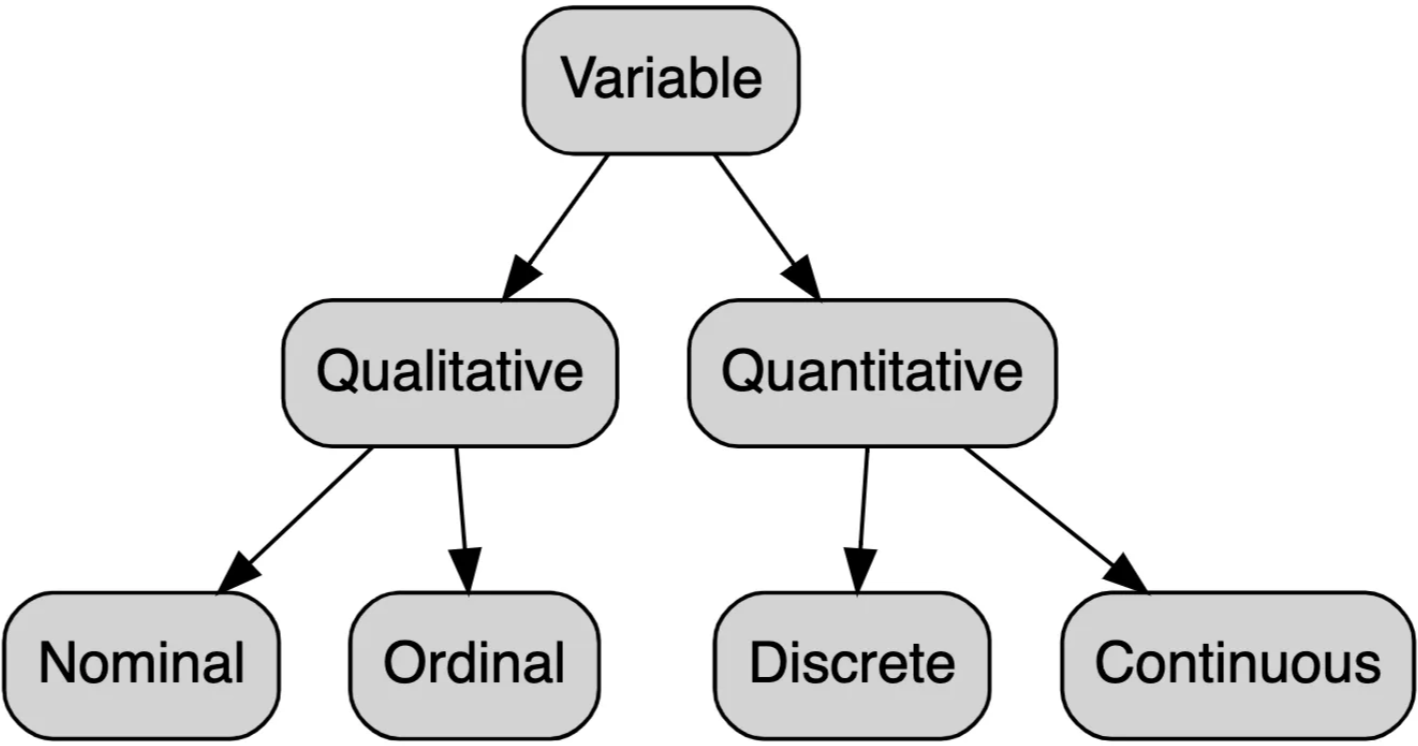

Image source https://towardsdatascience.com/variable-types-and-examples-cf436acaf769

1. **Categorical Variables**: (https://statisticseasily.com/categorical-variable/)

A categorical variable is a type of qualitative data that is grouped into distinct categories or classifications. These variables are non-numeric and represent some qualitative property of the data. In the Palmer Penguin Data Set, the sex of the penguin, the species of the penguin, and the island it was sighted on can all be classified as categorical variables. Categorical variables are typically separated into two types: nominal and ordinal. Nominal variables are categorical variables without a natural or intrinsic order, such as name and sex. Ordinal variables imply a specific rank or order, such as a rating scale (poor, fair, good, very good, excellent). Each value has a particular ranking order, with poor representing the bottom and excellent at the top. All the categorical data used in this project fall under the nominal categorical variable type (sex, species, island). This data needs to be encoded numerically through label encoding or one-hot encoding. One-hot encoding is the preferred method, as label encoding may imply a ranking between values (https://www.statology.org/label-encoding-vs-one-hot-encoding/).

2. **Numeric Variables**: (https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm)

Numeric variables (also called quantitative variables) are quantifiable data represented with numbers. They can be further divided into two categories: continuous and discrete variables. Continuous variables are data points that can assume an infinite number of real values within a given interval, such as a person's height. A person's measured height could theoretically have an infinite number of values as the precision of the measuring tools increases (1.62 m to 1.62364757 m, etc.). A simpler way to look at continuous variables would be numerical variables obtained through measurement. Discrete variables differ, as they can only assume a finite number of values within an interval, such as the number of cars on a street. All the numerical variables used in this project fall under the continuous numeric variable type (bill length, bill depth, flipper length, body mass). These variables provide quantifiable data about the physical characteristics of the penguins. This data can be modeled directly and can be used to investigate significant relationships between the variables or for predictive modeling.

3. **Binary Variables**:

Binary variables are variables that only have two possible outcomes, such as pass/fail or true/false. The sex of the penguins is a categorical variable that can be converted to a binary variable, as there are only two possible outcomes: male or female. These variables can be encoded similarly to categorical variables.

4. **Target Variables**:

The target variable, sometimes referred to as the dependent variable, is the variable that we want to predict or explain using modeling. For example, if we wanted to determine the species of a penguin based on its physical characteristics, such as its flipper length, in this case, the species would be the target variable.


## Barchart and Histogram

A bar chart of an appropriate variable (Species distribution) in the data set.

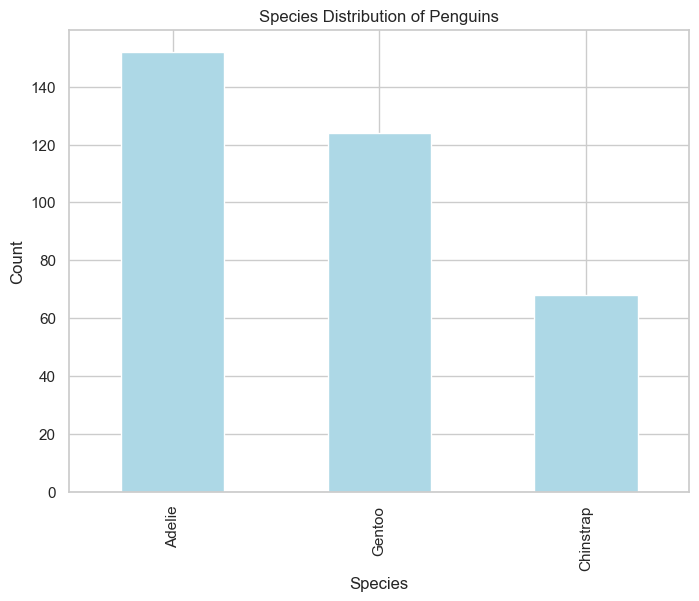

In [38]:
# Bar chart of species distribution
import matplotlib.pyplot as plt
import pandas as pd

species_counts = df['species'].value_counts() # Gives the frequency of each species in the dataframe, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html (shows how to use the dataframe.value_counts() function).

plt.figure(figsize=(8, 6)) # Adjusts figure size
species_counts.plot(kind='bar', color='lightblue') # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html (explains how to construct a barchart using the pandas module).

# Labelling axes
plt.title('Species Distribution of Penguins')
plt.xlabel('Species')
plt.ylabel('Count')


plt.show()

A histogram of an appropriate variable (Bill Lengths) in the data set. Geeksforgeeks.org show how to plot a histogram using the iris data here https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/.

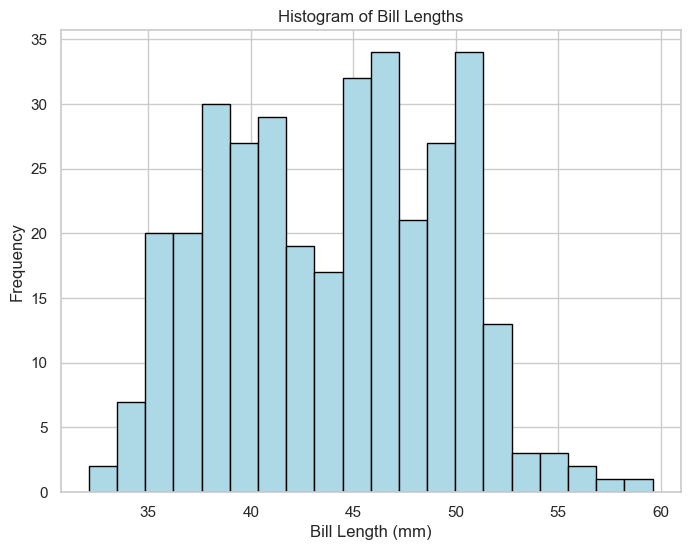

In [39]:
# Histogram of Bill Lengths

plt.figure(figsize=(8, 6))
x = df['bill_length_mm'] # assigns bill length data from data frame to x variable
plt.hist(x, bins=20, color='lightblue', edgecolor='black') # plots a histogram using x, bins = number of bars

# Labelling axes
plt.title('Histogram of Bill Lengths')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')

plt.show()

## Analysis of two variables from the data set

The two variables that will be analysed for this project are the flipper length (flipper_length_mm) and body mass (body_mass_g) of the penguins. These variables were chosen to investigate if there is a positive correlation between the two. To begin this analysis, the data must be cleaned. This will be performed by first checking the data set for any missing values.

In [40]:
# Check for missing values in 'flipper_length_mm' and 'body_mass_g' columns
# The .isnull().sum() method can be used to check for missing values by variable, https://miamioh.edu/centers-institutes/center-for-analytics-data-science/students/coding-tutorials/python/data-cleaning.html

missing_flipper_length = df['flipper_length_mm'].isnull().sum() # Check missing flipper length values
missing_body_mass = df['body_mass_g'].isnull().sum() # Check missing body mass values

# Print function for missing values
print("Number of missing values in 'flipper_length_mm':", missing_flipper_length)
print("Number of missing values in 'body_mass_g':", missing_body_mass)



Number of missing values in 'flipper_length_mm': 2
Number of missing values in 'body_mass_g': 2


The missing values can then be omitted from the data set.

In [41]:
# Drop rows with missing values using the dropna() function in pandas, https://miamioh.edu/centers-institutes/center-for-analytics-data-science/students/coding-tutorials/python/data-cleaning.html
cleaned_df = df.dropna(subset=['flipper_length_mm', 'body_mass_g']) # cleaned_df is the original data set without the missing variables.

# Let's have a look at the cleaned DataFrame
print(cleaned_df)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

After cleaning the data, it can now be plotted and visualized graphically. Scatter plots are a great analysis tool as they can show if there is a correlation between two variables. The scatter plots will be generated using the Matplotlib plotting library. Matplotlib is an open-source plotting library that can be imported into Python. This library allows data to be easily visualized for further investigation and analysis. The source code for the Matplotlib library can be found on this GitHub repository: https://github.com/matplotlib/matplotlib. Tutorials on how to use the library can be found on the W3Schools website: https://www.w3schools.com/python/matplotlib_scatter.asp. The Matplotlib website provides further details of the documentation and contains more in-depth knowledge of its use; it can be found here: https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py.

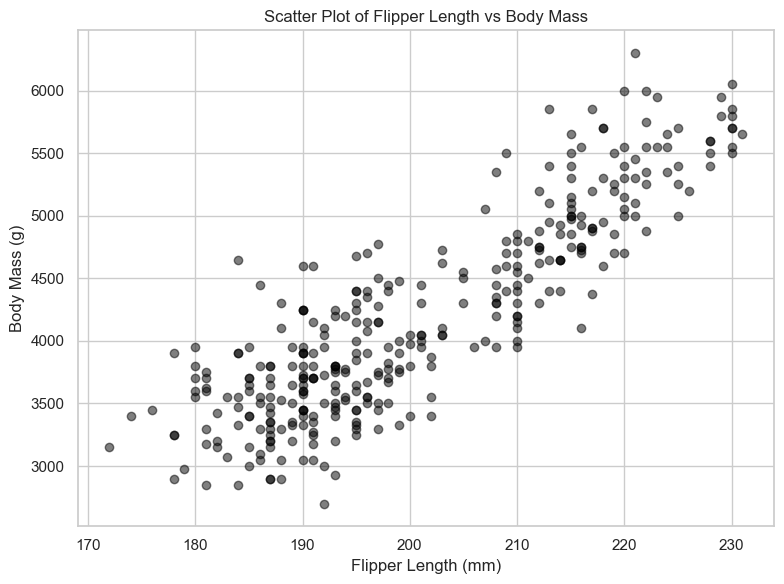

In [42]:

# Scatter plot of 'flipper_length_mm' vs 'body_mass_g'
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['flipper_length_mm'], cleaned_df['body_mass_g'], color='black', alpha=0.5)

# Add labels and title
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Show plot
plt.grid(True) # adds gridlines 
plt.tight_layout() # fits subplots onto the figure area 
plt.show()

Each black dot represents a penguin in the dataset, showing their measured flipper length (mm) and body mass (g). The dots are given an alpha value of 0.5, making them semi-transparent and allowing overlapping data points to be easily read. A regression line or trend line will be added to show the correlation between the two variables. The seaborn library will be imported to generate the regression line. Seaborn is another Python data visualization library based on Matplotlib. It allows the generation of statistical graphics such as regression lines. Tutorials on using the seaborn function can be found here: https://seaborn.pydata.org/tutorial/regression.html

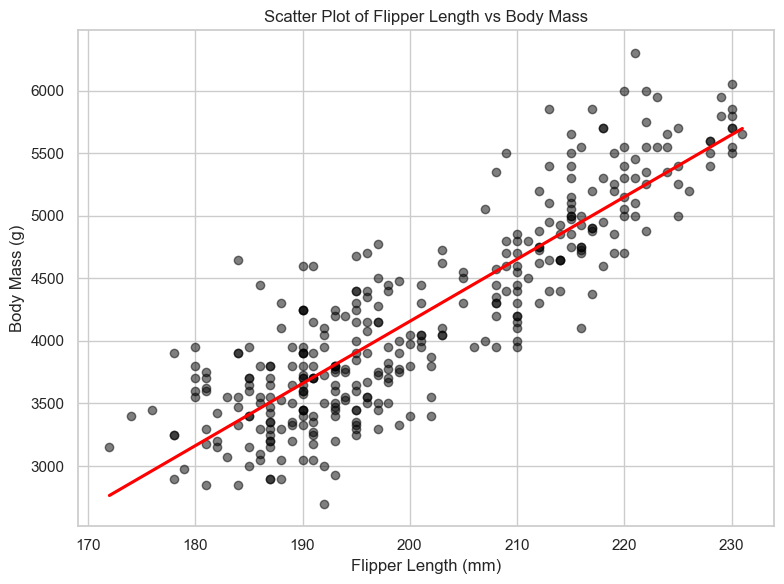

In [43]:
import seaborn as sbrn

# Scatter plot of 'flipper_length_mm' vs 'body_mass_g'
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['flipper_length_mm'], cleaned_df['body_mass_g'], color='black', alpha=0.5)

sbrn.regplot(x='flipper_length_mm', y='body_mass_g', data=cleaned_df, scatter=False, color='red', ci=None)

# Add labels and title
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

The fitted regression line shows that there is a strong positive correlation between flipper length and body mass variables. As the flipper length increases, the body mass also tends to increase. This correlation tells us that larger penguins generally have longer flippers. There are a few outliers within the data; as you can see, the heaviest penguin did not have the longest flippers, and the lightest penguin had longer flippers than a significant portion of the other penguins. The data is spread out a bit from the regression line, which indicates that the two variables are not directly proportional to one another, suggesting that other factors influence flipper length aside from body mass.

To find out the degree of correlation between the two variables, the correlation coefficient can be calculated.

In [44]:
flipper_length = cleaned_df['flipper_length_mm']
body_mass = cleaned_df['body_mass_g']

# Calculate the correlation coefficient
correlation = flipper_length.corr(body_mass) # https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/

print(correlation)

0.8712017673060113


The correlation coefficient is a tool that measures the strength of a linear relationship between two variables, ranging from -1 to 1. A negative number indicates an inverse relationship, with -1 indicating a perfect inverse relationship, while +1 indicates a perfect direct relationship. A value of 0 indicates no relationship. More information on the correlation coefficient can be found here: https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression. A correlation coefficient of 0.87 was calculated, indicating a strong positive correlation between flipper length and body mass. A value of 0.87 was also found in articles https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95 and https://rpubs.com/shahworld/scatter.

A third variable can be added to the scatter graph to provide more information about the dataset. This can be achieved by changing the colour of the dots to denote which species the data point represents.

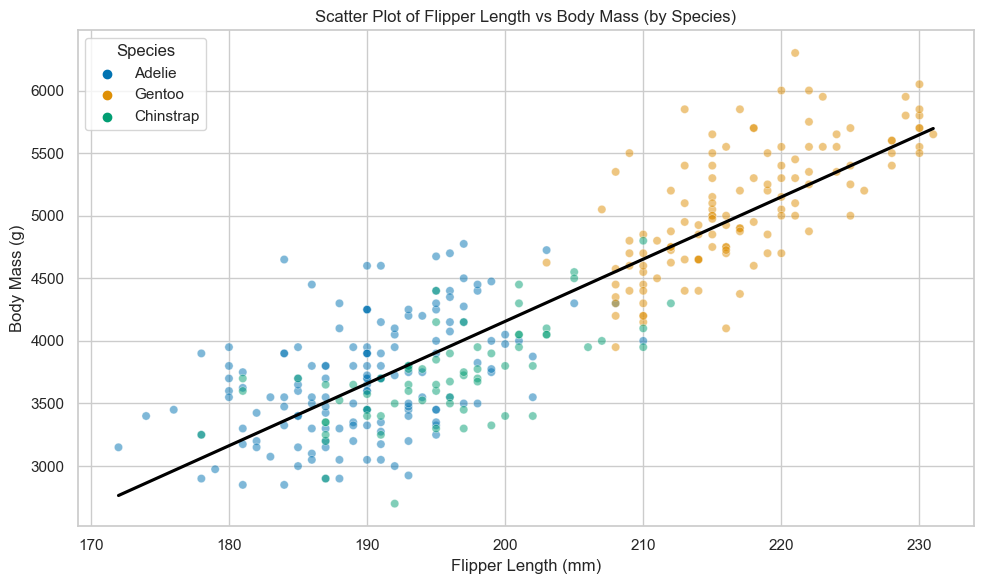

In [45]:

# Create a scatter plot with hue for species
plt.figure(figsize=(10, 6))
sbrn.scatterplot(data=cleaned_df, x='flipper_length_mm', y='body_mass_g', hue='species', palette='colorblind', alpha=0.5)

# Add a regression line
sbrn.regplot(data=cleaned_df, x='flipper_length_mm', y='body_mass_g', scatter=False, color='black', ci=None)

# Add labels and title
plt.title('Scatter Plot of Flipper Length vs Body Mass (by Species)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Show legend
plt.legend(title='Species')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

The addition of colors to differentiate between species in the scatter graph shows that the Gentoo species of penguins are the largest of the three species, with longer flippers and higher body masses. The Chinstrap and Adelie penguins are more clustered together, with the Chinstraps being slightly larger than the Adelie penguins. There is a general positive correlation between flipper length and body mass across all three species.

The data can be used to generate a grid of subplots, with each plot representing penguins of each species and each data point corresponding to a male or female penguin. The scatter graphs can then be analyzed to see which of the sexes is larger in each species. The seaborn module was used to generate these graphs; the tutorial of which can be found at https://seaborn.pydata.org/tutorial/axis_grids.html.

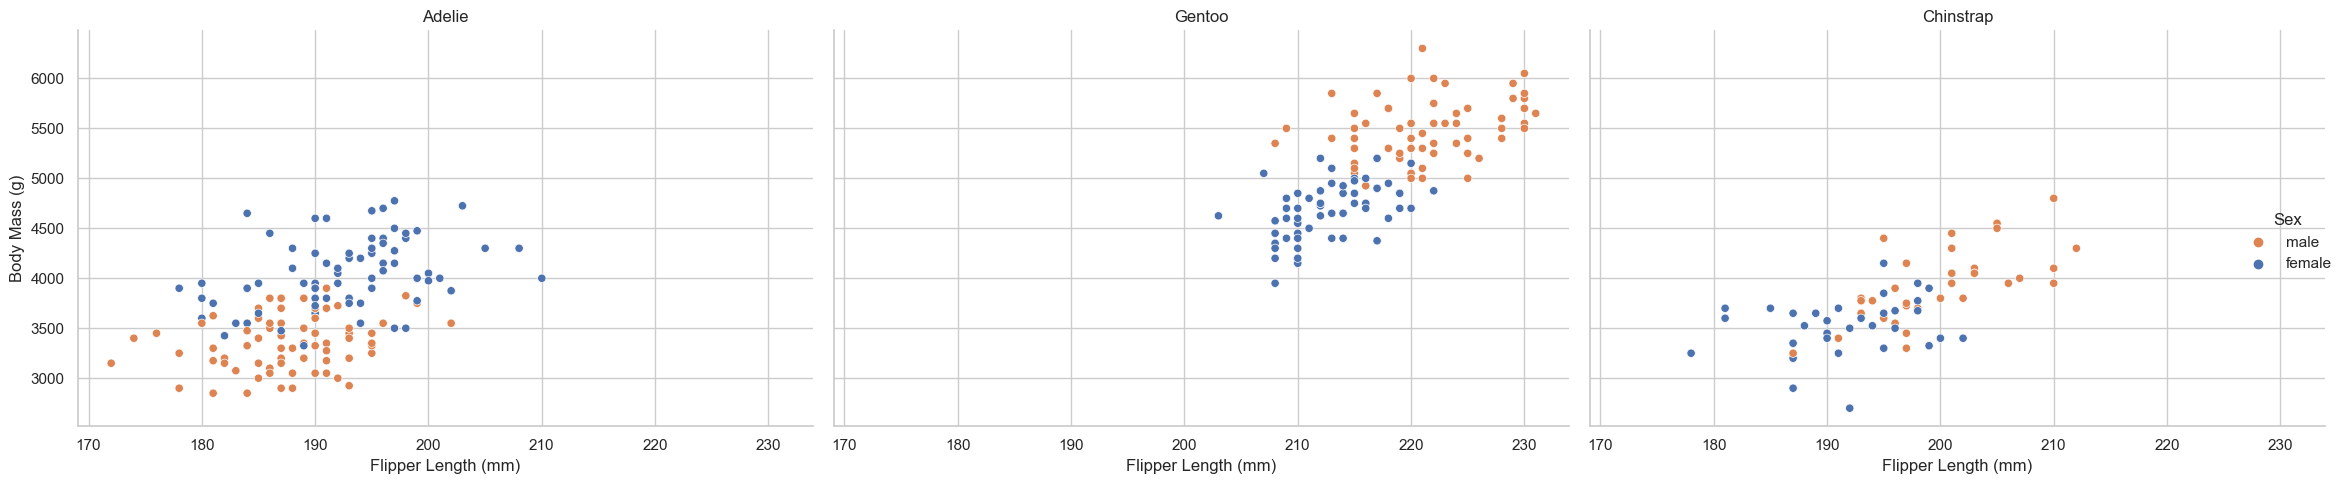

In [49]:

# Create a FacetGrid with cleaned_df DataFrame, using 'species' as row variable
g = sbrn.FacetGrid(cleaned_df, col="species", height=5, aspect=1.5)

# Map scatterplot to each facet
g.map_dataframe(sbrn.scatterplot, x='flipper_length_mm', y='body_mass_g', hue='sex')

# Set titles for each subplot
g.set_titles("{col_name}")

# Add legend
g.add_legend(title='Sex')

# Set axis labels
g.set_axis_labels("Flipper Length (mm)", "Body Mass (g)")

# Show plot
plt.tight_layout()
plt.show()

The subplots of each penguin species show that there is a positive correlation between flipper length and body mass across all three species of penguins. The graphs also show that male penguins tend to have longer flippers and higher body mass compared to females, except for the Adelie species of penguin.

To investigate if the island the penguins were spotted on had any significance to their flipper length or body mass, a scatterplot was generated with the colour of each data point denoting which island the penguin originated.

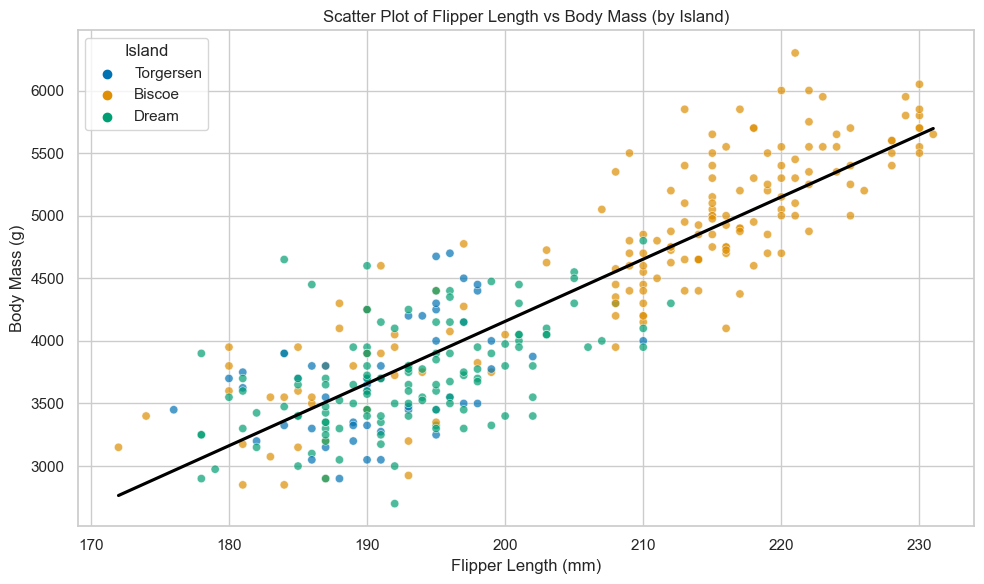

In [50]:
# Set the style of seaborn
sbrn.set(style="whitegrid")

# Create a scatter plot with hue for island
plt.figure(figsize=(10, 6))
sbrn.scatterplot(data=cleaned_df, x='flipper_length_mm', y='body_mass_g', hue='island', palette='colorblind', alpha=0.7)

# Add a regression line for each island
sbrn.regplot(data=cleaned_df, x='flipper_length_mm', y='body_mass_g', scatter=False, color='black', ci=None)

# Add labels and title
plt.title('Scatter Plot of Flipper Length vs Body Mass (by Island)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Show legend
plt.legend(title='Island')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

The graph generated looks very similar to the previous scatterplot of flipper length vs. body mass by species. After looking at the dataset in detail, it is apparent that Gentoo penguins were only spotted on the Biscoe island, and Chinstrap penguins were only spotted on Dream island. However, Adelie penguins were spotted across all three islands. A scattergraph of the flipper length vs. body mass using just the Adelie penguin data would provide insight into whether the island had any significant effect on flipper length or body mass of the Adelie penguins.

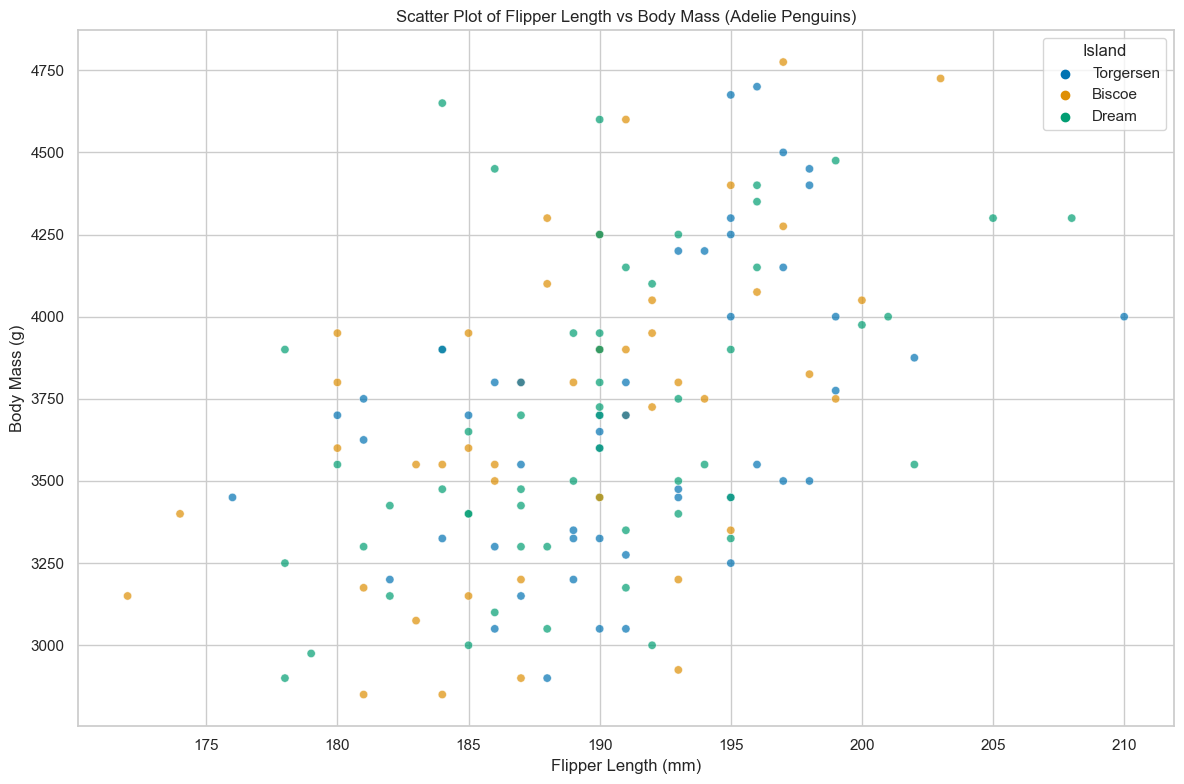

In [51]:
# Filter the DataFrame for Adelie species
adelie_df = cleaned_df[cleaned_df['species'] == 'Adelie']

# Create separate scatter plots for each island
plt.figure(figsize=(12, 8))
sbrn.scatterplot(data=adelie_df, x='flipper_length_mm', y='body_mass_g', hue='island', palette='colorblind', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Flipper Length vs Body Mass (Adelie Penguins)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Show legend
plt.legend(title='Island')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot shows that the island the Adelie penguins were spotted on is irrelevant to their flipper length or body mass, as no discernible pattern can be seen.

## Conclusion

Based on the analysis of the Palmer Penguins dataset, several conclusions can be drawn:

1. **Physical Characteristics**: The dataset provides insights into the physical characteristics of penguins, including their bill length, bill depth, flipper length, body mass, and sex. Understanding these attributes can aid in studying penguin biology and behavior.

2. **Species Differentiation**: The dataset contains three species of penguins: Adelie, Chinstrap, and Gentoo. Each species exhibits distinct characteristics, with Gentoo penguins generally being the largest and Adelie penguins being the smallest.

3. **Island Distribution**: The penguins were observed on three different islands: Dream, Torgersen, and Biscoe. While Gentoo and Chinstrap penguins were only found on Biscoe and Dream islands, respectively, Adelie penguins were observed across all three islands.

4. **Correlation Analysis**: A strong positive correlation was found between flipper length and body mass across all penguin species. This indicates that larger penguins tend to have longer flippers and higher body masses. Additionally, male penguins generally exhibited longer
   flippers and higher body masses compared to females, except in the Adelie species.

5. **Effect of Island**: While the island of observation seemed to have little effect on the physical characteristics of Adelie penguins, it played a role in the distribution of Chinstrap and Gentoo penguins.

6. **Data Visualization**: Various data visualization techniques, including scatter plots, bar charts, and histograms were employed to explore and present the relationships between different variables in the dataset.

In conclusion, the Palmer Penguins dataset serves as a valuable resource for studying penguin biology and behavior. The analysis conducted provides insights into the physical characteristics and distribution patterns of different penguin species, contributing to our understanding of penguins across the Palmer archipelago.

***

## End